# 1. Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('Tesla.csv - Tesla.csv.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


# 2. Splitting data as train and validation

In [5]:
length_data = len(data)
split_ratio = 0.7
length_train = round(length_data * split_ratio)
length_validation = length_data - length_train
print("Data length:",length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length: 1692
Train data length : 1184
Validation data lenth : 508


In [6]:
train_data = data[:length_train].iloc[:,:2]
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data

,Date,Open
0,2010-06-29,19.000000
1,2010-06-30,25.790001
2,2010-07-01,25.000000
3,2010-07-02,23.000000
4,2010-07-06,20.000000
...,...,...
1179,2015-03-06,199.210007
1180,2015-03-09,194.389999
1181,2015-03-10,188.460007
1182,2015-03-11,191.149994


In [7]:
validation_data = data[length_train:].iloc[:,:2]
validation_data['Date'] = pd.to_datetime(validation_data['Date'])
validation_data

,Date,Open
1184,2015-03-13,188.949997
1185,2015-03-16,192.000000
1186,2015-03-17,195.429993
1187,2015-03-18,194.960007
1188,2015-03-19,202.000000
...,...,...
1687,2017-03-13,244.820007
1688,2017-03-14,246.110001
1689,2017-03-15,257.000000
1690,2017-03-16,262.399994


# 3. Creating train dataset from train split
### We will get Open column as our dataset
### Dataset to be converted to array by adding .values

In [8]:
dataset_train = train_data.Open.values
dataset_train.shape

(1184,)

In [9]:
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(1184, 1)

## 4. Normalization/Feature Scaling

* Dataset values will be 0 and 1 after scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)
dataset_train_scaled.shape

(1184, 1)

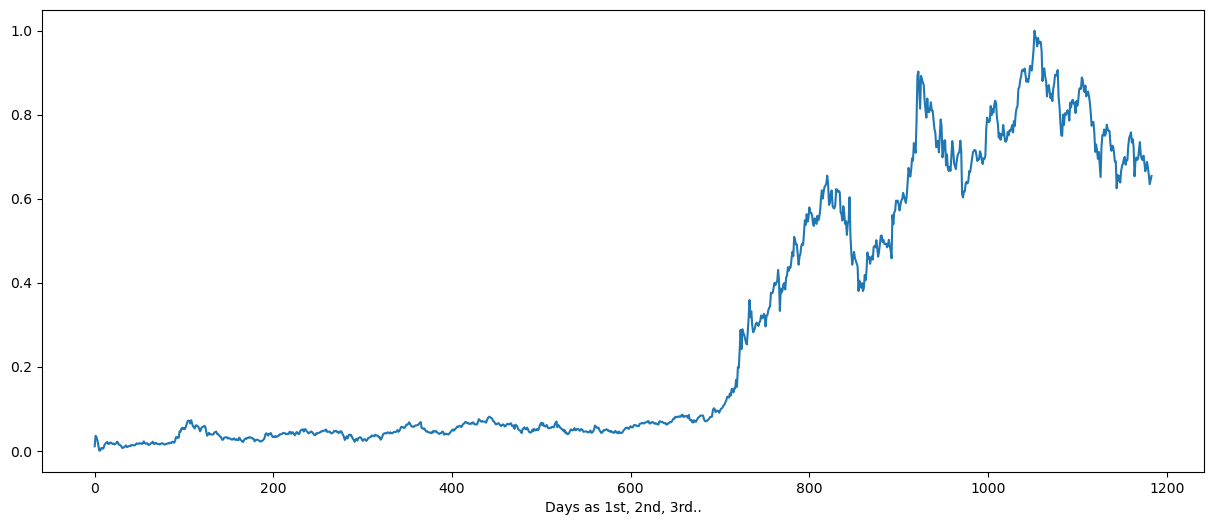

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.show()

## 5. Creating X_train and y_train from Train data

In [12]:
X_train = []
y_train = []

time_step = 50

for i in range(time_step, length_train): 
    X_train.append(dataset_train_scaled[i-time_step:
                                        i,0])
    y_train.append(dataset_train_scaled[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print("Shape of X_train before reshape :", X_train.shape)
print("Shape of y_train before reshape :", y_train.shape)

Shape of X_train before reshape : (1134, 50)
Shape of y_train before reshape : (1134,)


## Reshape

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape:", X_train.shape)
print("Shape of y_train after reshape:", y_train.shape)

Shape of X_train after reshape: (1134, 50, 1)
Shape of y_train after reshape: (1134, 1)


* Shape of X_train: 1134*50*1
* That means we have 1134 rows, each row has 50 rows and 1 column
* Lets check the first row:it has 50 rows(open prices of 49 days)

In [15]:
X_train[0]

array([[0.01053291],
       [0.03553936],
       [0.03262991],
       [0.02526425],
       [0.01421574],
       [0.00095754],
       [0.        ],
       [0.00530328],
       [0.00666594],
       [0.00460354],
       [0.00662911],
       [0.01399478],
       [0.01679373],
       [0.01926123],
       [0.02102899],
       [0.01664641],
       [0.01605716],
       [0.01859832],
       [0.01973999],
       [0.01756712],
       [0.0162413 ],
       [0.01705153],
       [0.01495231],
       [0.01605716],
       [0.01789858],
       [0.02139727],
       [0.01988731],
       [0.01458403],
       [0.01384746],
       [0.01292675],
       [0.00939123],
       [0.0061135 ],
       [0.00751299],
       [0.00850735],
       [0.01038559],
       [0.01270578],
       [0.00883881],
       [0.00924392],
       [0.01086436],
       [0.01145362],
       [0.01112216],
       [0.01381063],
       [0.01329503],
       [0.0131109 ],
       [0.01296358],
       [0.01281627],
       [0.0155784 ],
       [0.017

* Chcek the first in y_train
* It is the price of 50th day

In [16]:
y_train[0]

array([0.01789858])

## 6.Creating RNN model

In [17]:
pip cache purge

Files removed: 3
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --upgrade tensorflow keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )


# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

# adding fourth RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50)
             )

regressor.add(
    Dropout(0.2)
             )

# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 6.9467e-04 - loss: 0.3772
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 8.6409e-04 - loss: 0.2541
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0000e+00 - loss: 0.1428
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0956
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 2.9459e-04 - loss: 0.0847
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.0020 - loss: 0.0652
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 6.9467e-04 - loss: 0.0443
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 3.9605e-04 - loss: 0.0388
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0322
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 7.4746e-04 - loss: 0.0258
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 3.2708e-04 - loss: 0.0317
Epoch 12/50
36/36 ━━━━━

## 7.Evaluating Model

In [21]:
# Losses
history.history["loss"]

[0.32299402356147766,
 0.21684910356998444,
 0.135624960064888,
 0.08966197818517685,
 0.07637449353933334,
 0.05556380748748779,
 0.04300342872738838,
 0.040204569697380066,
 0.031173869967460632,
 0.02634681575000286,
 0.03010713867843151,
 0.02267768792808056,
 0.022604621946811676,
 0.019816074520349503,
 0.01746390387415886,
 0.016044851392507553,
 0.015616385266184807,
 0.014679293148219585,
 0.0144418990239501,
 0.014564182609319687,
 0.010847466997802258,
 0.011883984319865704,
 0.010250551626086235,
 0.010409517213702202,
 0.009215116500854492,
 0.009993561543524265,
 0.009666064754128456,
 0.008869236335158348,
 0.007602271158248186,
 0.008231926709413528,
 0.007282326929271221,
 0.007714760024100542,
 0.007803075946867466,
 0.006905688904225826,
 0.0065529015846550465,
 0.006298332009464502,
 0.005870382767170668,
 0.005861576180905104,
 0.00585944764316082,
 0.006447889842092991,
 0.006003767251968384,
 0.005078265909105539,
 0.005091371946036816,
 0.005521094426512718,
 0.

<function matplotlib.pyplot.show(close=None, block=None)>

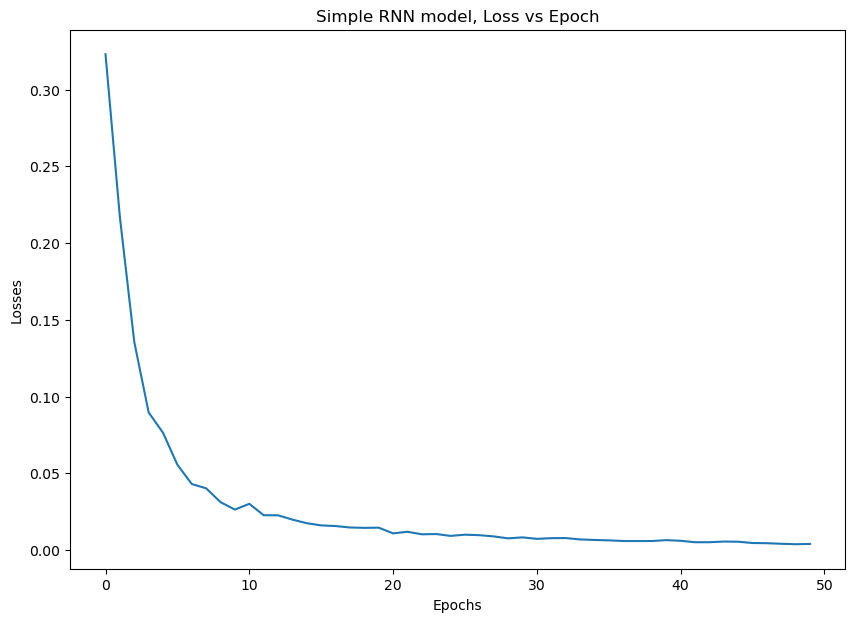

In [22]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show

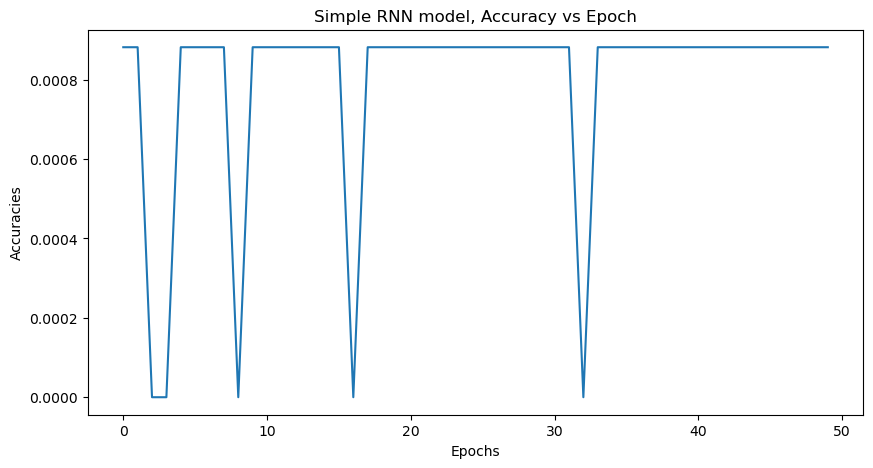

In [23]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

## Model predictions for train data

In [24]:
y_pred = regressor.predict(X_train) #predictions
# scaling back from 0-1 to original
y_pred = scaler.inverse_transform(y_pred) 
y_pred.shape

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


(1134, 1)

In [25]:
# scaling back from 0-1 to original
y_train = scaler.inverse_transform(y_train)
y_train.shape

(1134, 1)

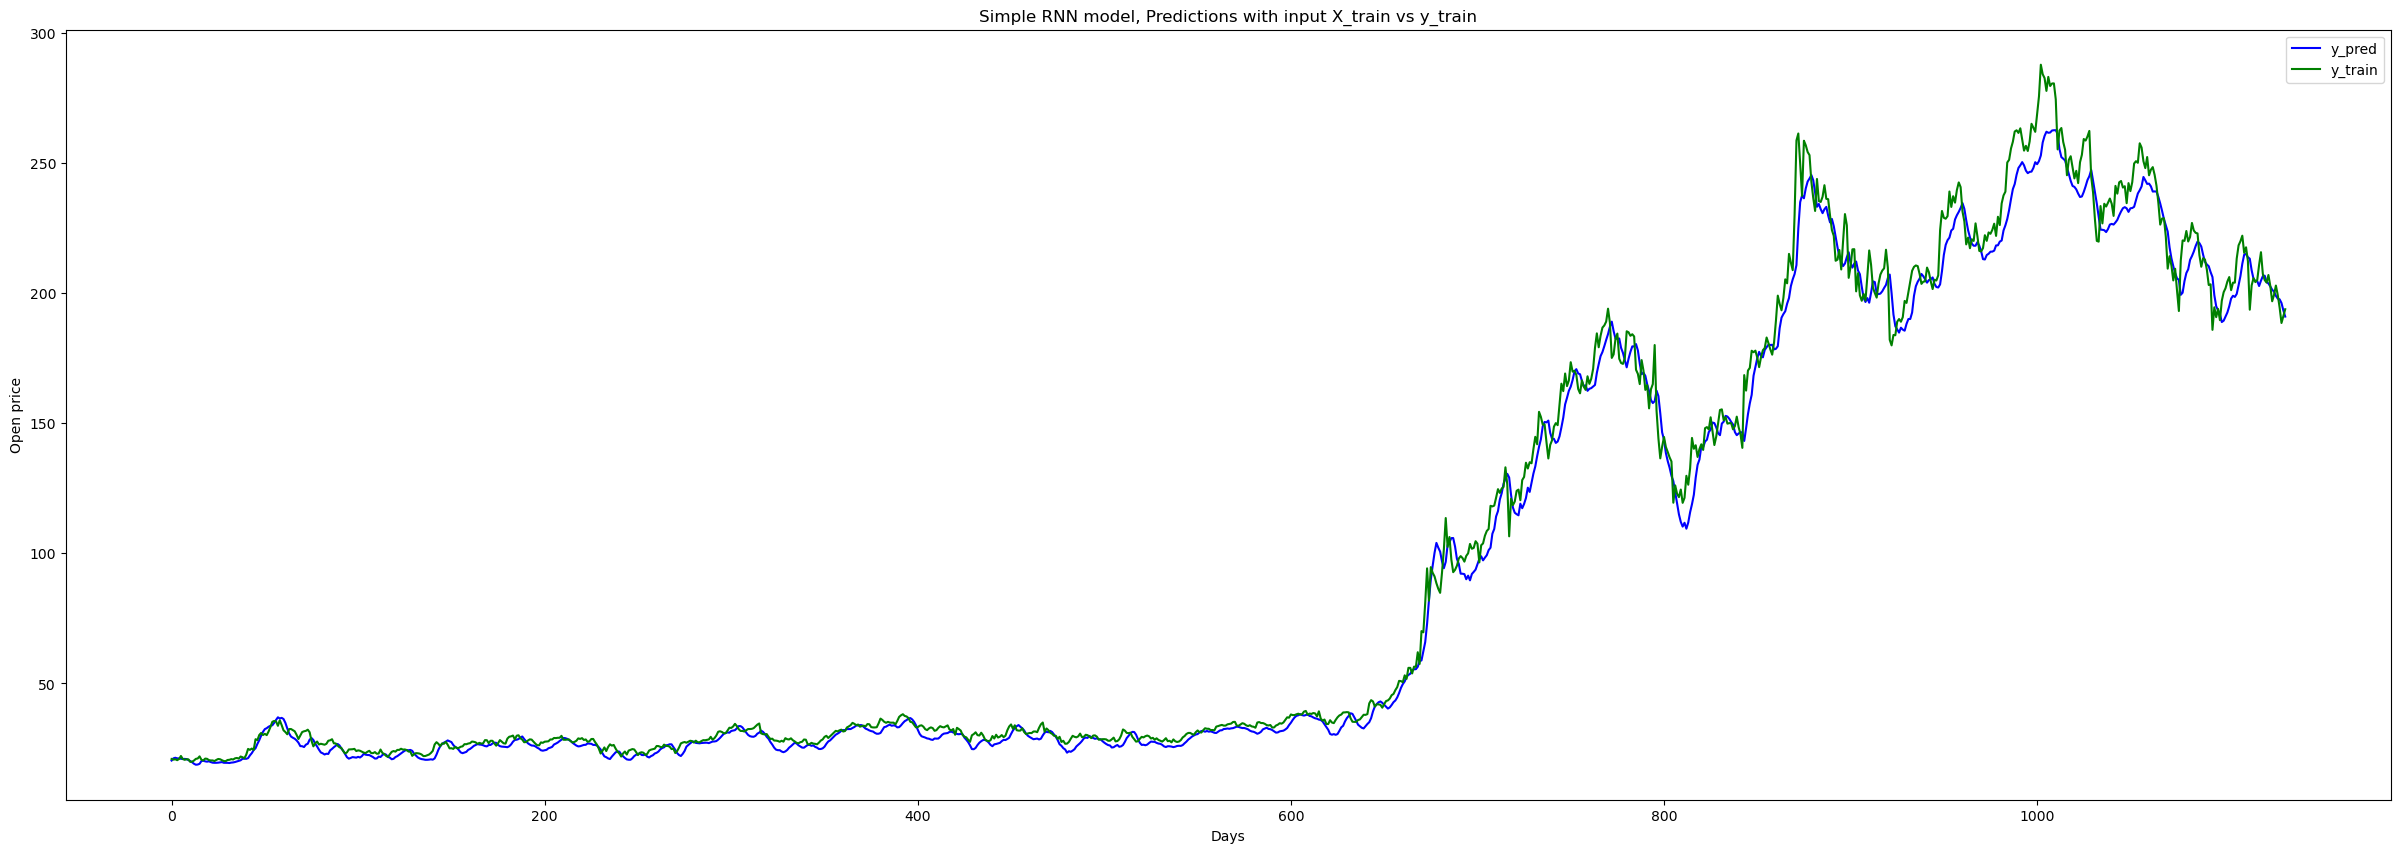

In [26]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

## 8.Creating Test Dataset from Validation Data
* Converting array and scaling

In [27]:
# getting "open" column and converting to array
dataset_validation = validation_data.Open.values
# converting 1D to 2D array
dataset_validation = np.reshape(dataset_validation,(-1,1))
# scaling open values to between 0 and 1
scaled_dataset_validation = scaler.fit_transform(dataset_validation)
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)                                               

Shape of scaled validation dataset : (508, 1)


### Creating X_text and y_test

In [28]:
# Creating X_text and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

    

### Converting to array

In [29]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [30]:
print("Shape of X_test before reshape:", X_test.shape)
print("Shape of y_test before reshape:", y_test.shape)

Shape of X_test before reshape: (458, 50)
Shape of y_test before reshape: (458,)


### Reshape

In [31]:
# reshape to 3D array
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# resahpe to 2D array
y_test = np.reshape(y_test, (-1,1))

In [32]:
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (458, 50, 1)
Shape of y_test after reshape : (458, 1)


## 9.Evaluating with Validation Data

In [33]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Shape of y_pred_of_test : (458, 1)


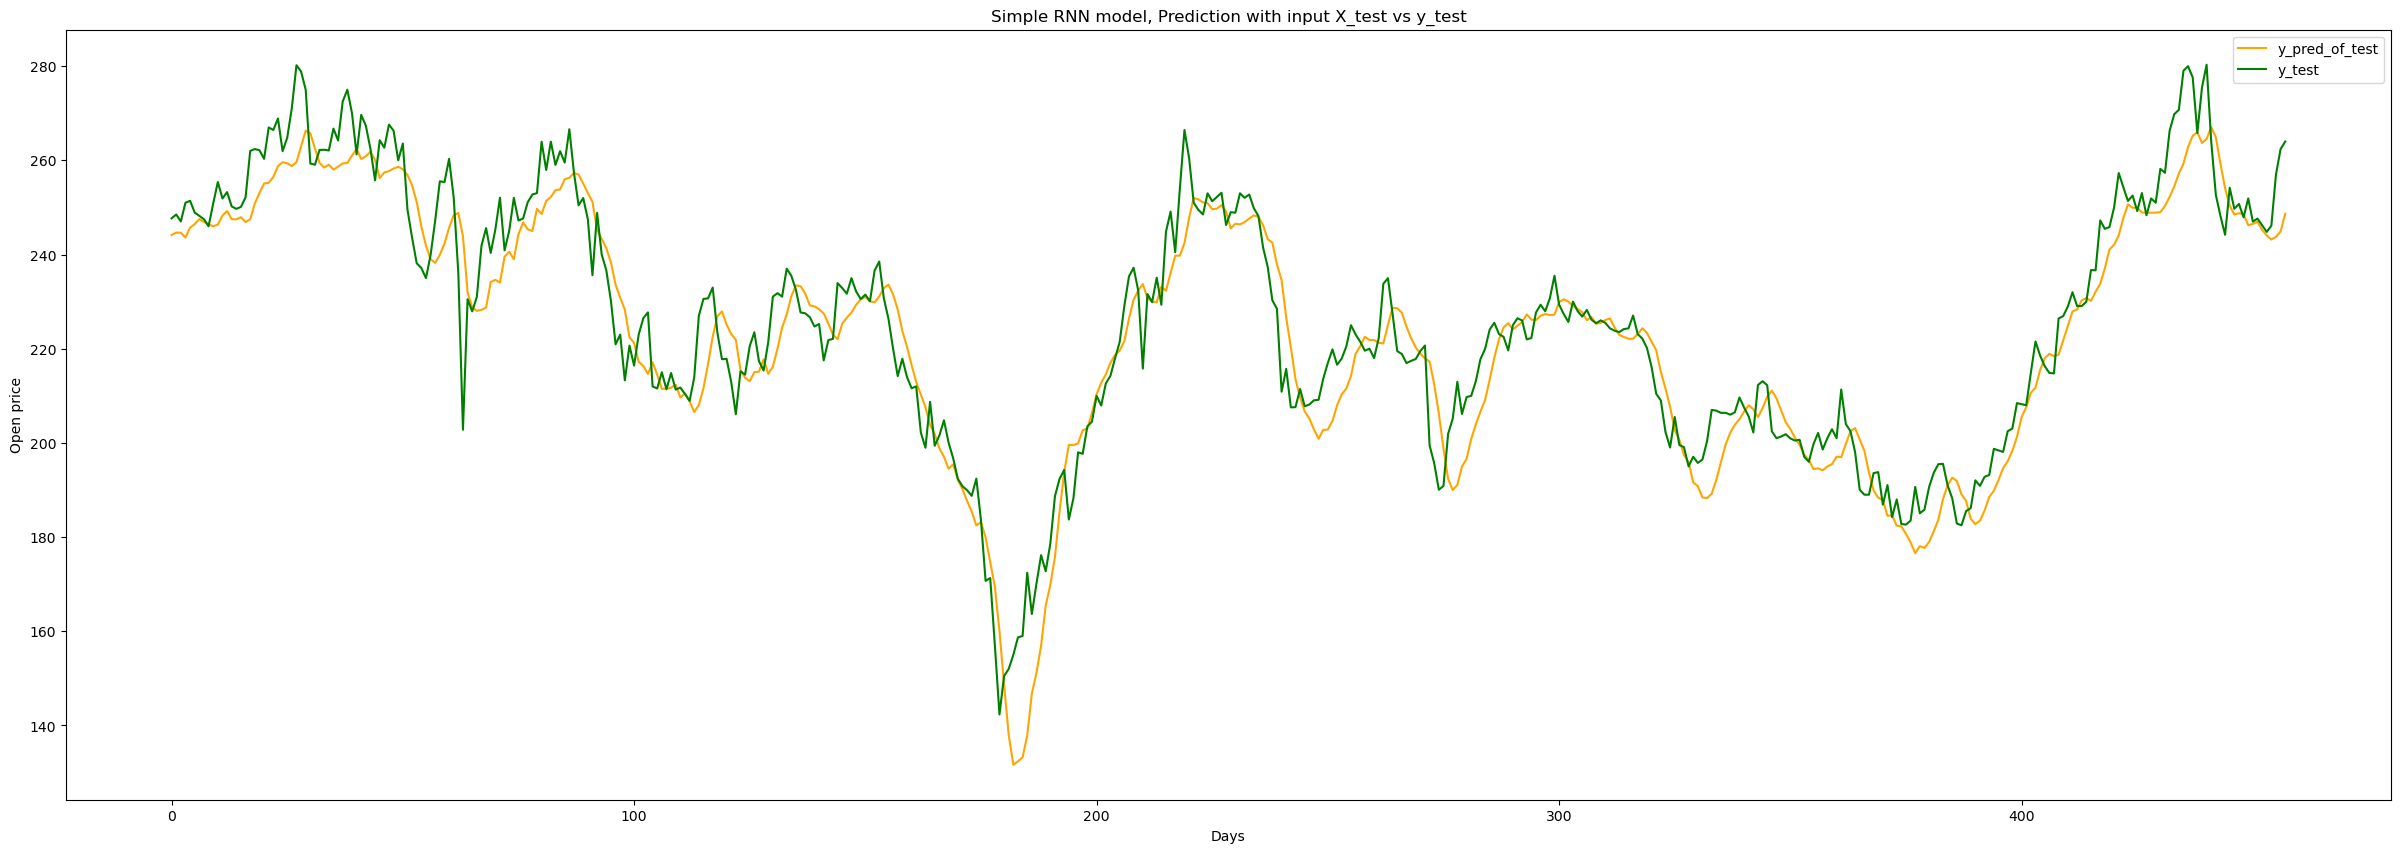

In [34]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

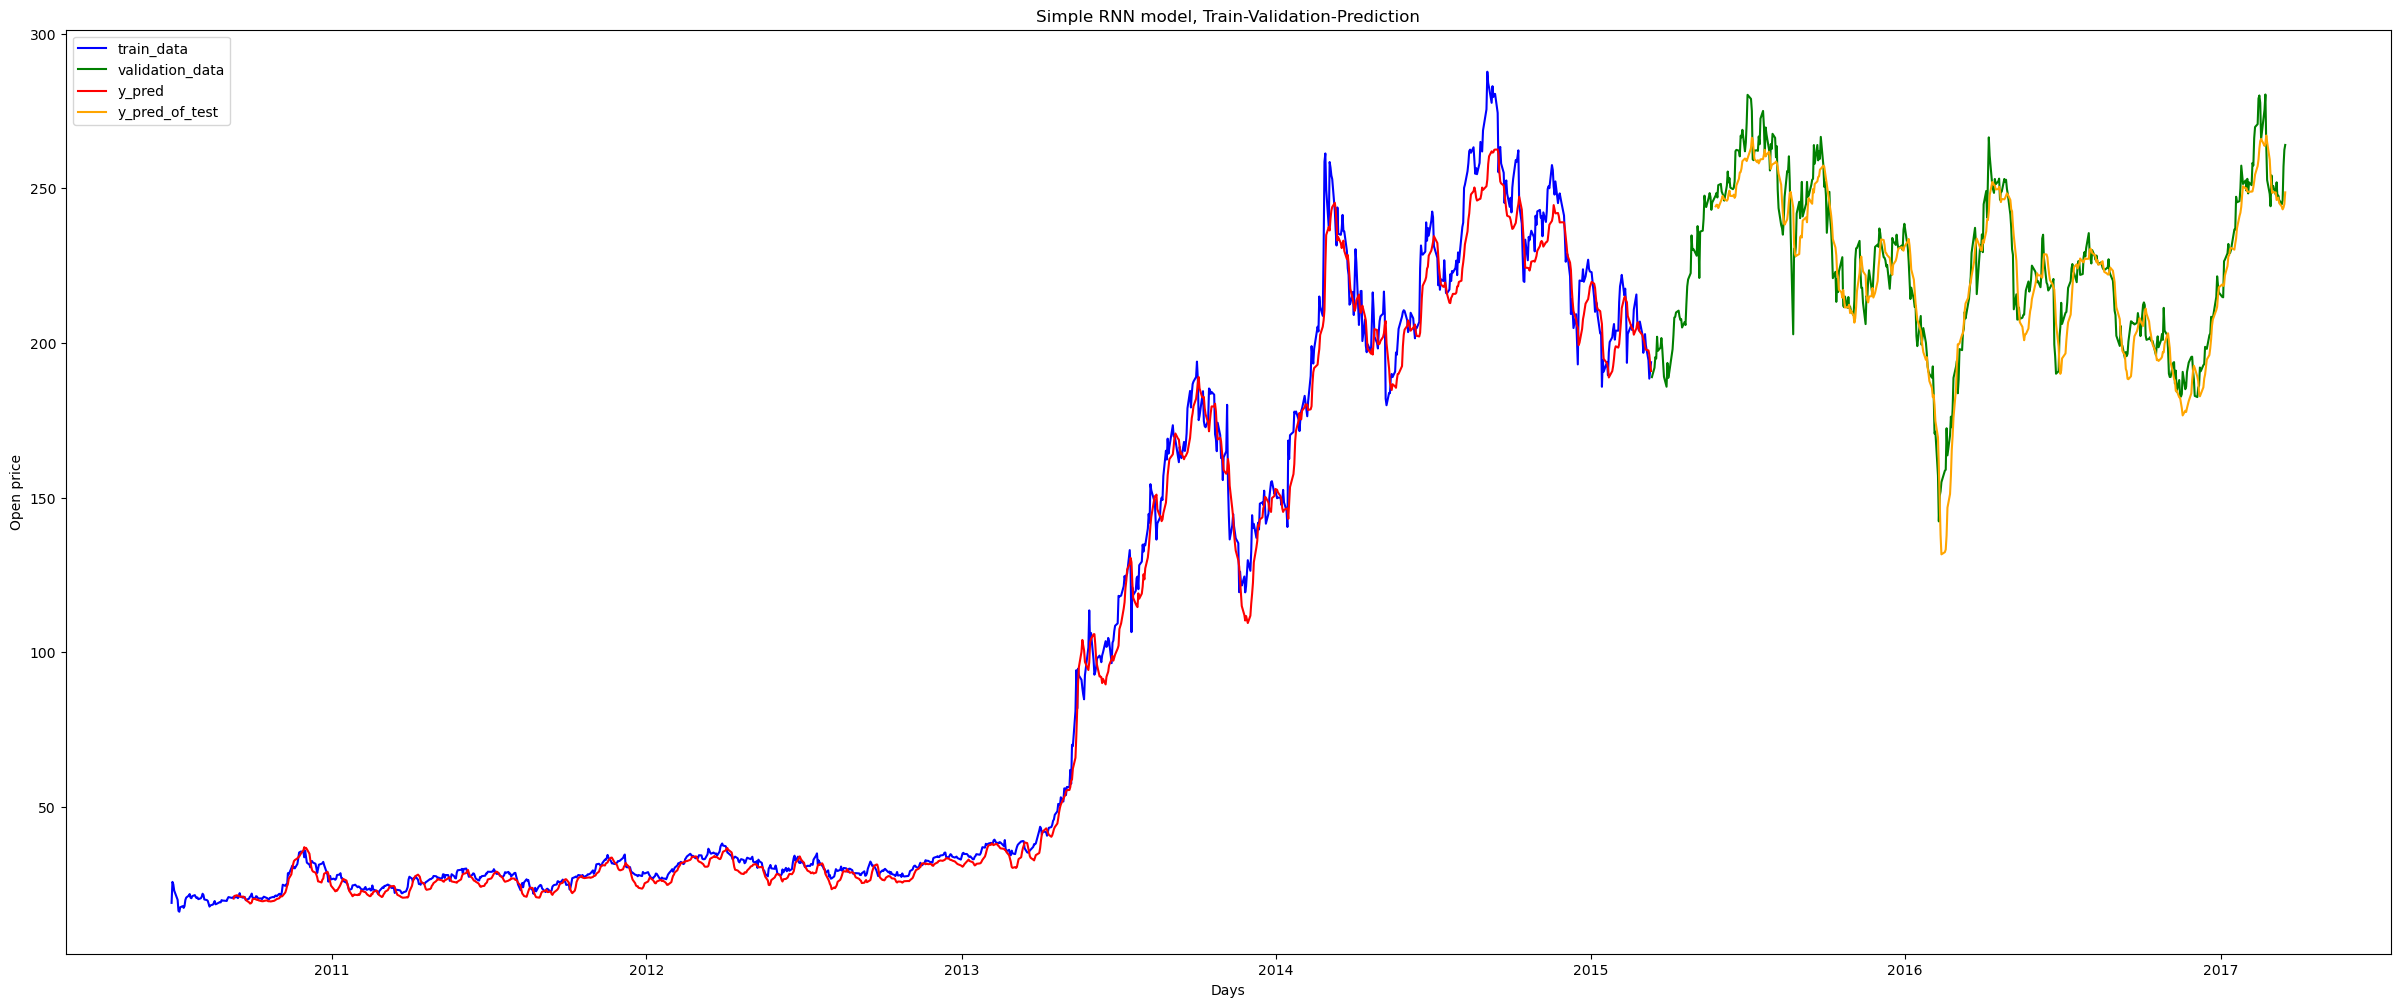

In [35]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.Date, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.Date, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.Date.iloc[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.Date.iloc[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

## 10.Creating LSTM Model

In [36]:
y_train = scaler.fit_transform(y_train)

In [37]:
from keras.layers import LSTM

model_lstm = Sequential()
# 64 lstm neuron block
model_lstm.add(LSTM(64,return_sequences = True, input_shape = (X_train.shape[1],1)))
model_lstm.add(LSTM(64, return_sequences = False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error",optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 3.3595e-04 - loss: 0.0339
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0015 - loss: 0.0012
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.5786e-04 - loss: 0.0010
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 4.8392e-04 - loss: 9.4556e-04
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0027 - loss: 0.0012
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 5.8546e-04 - loss: 7.3219e-04
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0013 - loss: 7.9457e-04
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.0026 - loss: 6.8170e-04
Epoch 9/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0012 - loss: 0.0012
Epoch 10/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0031 - loss: 7.2159e-04


## 11. Evaluating LSTM Model

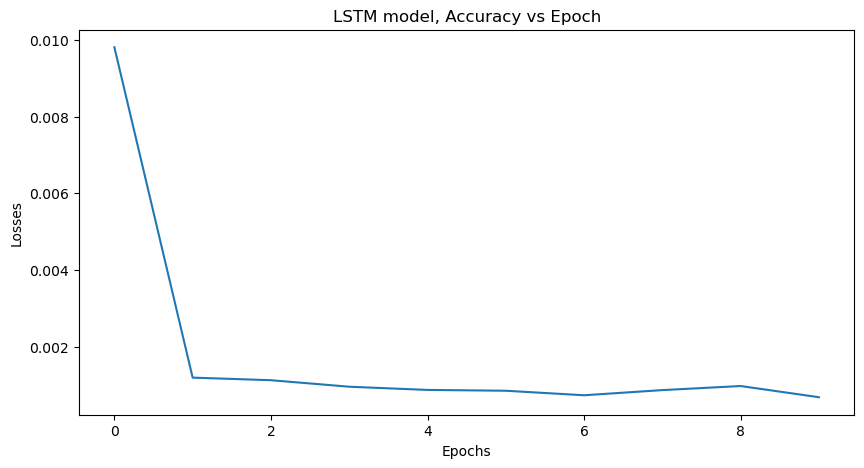

In [38]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


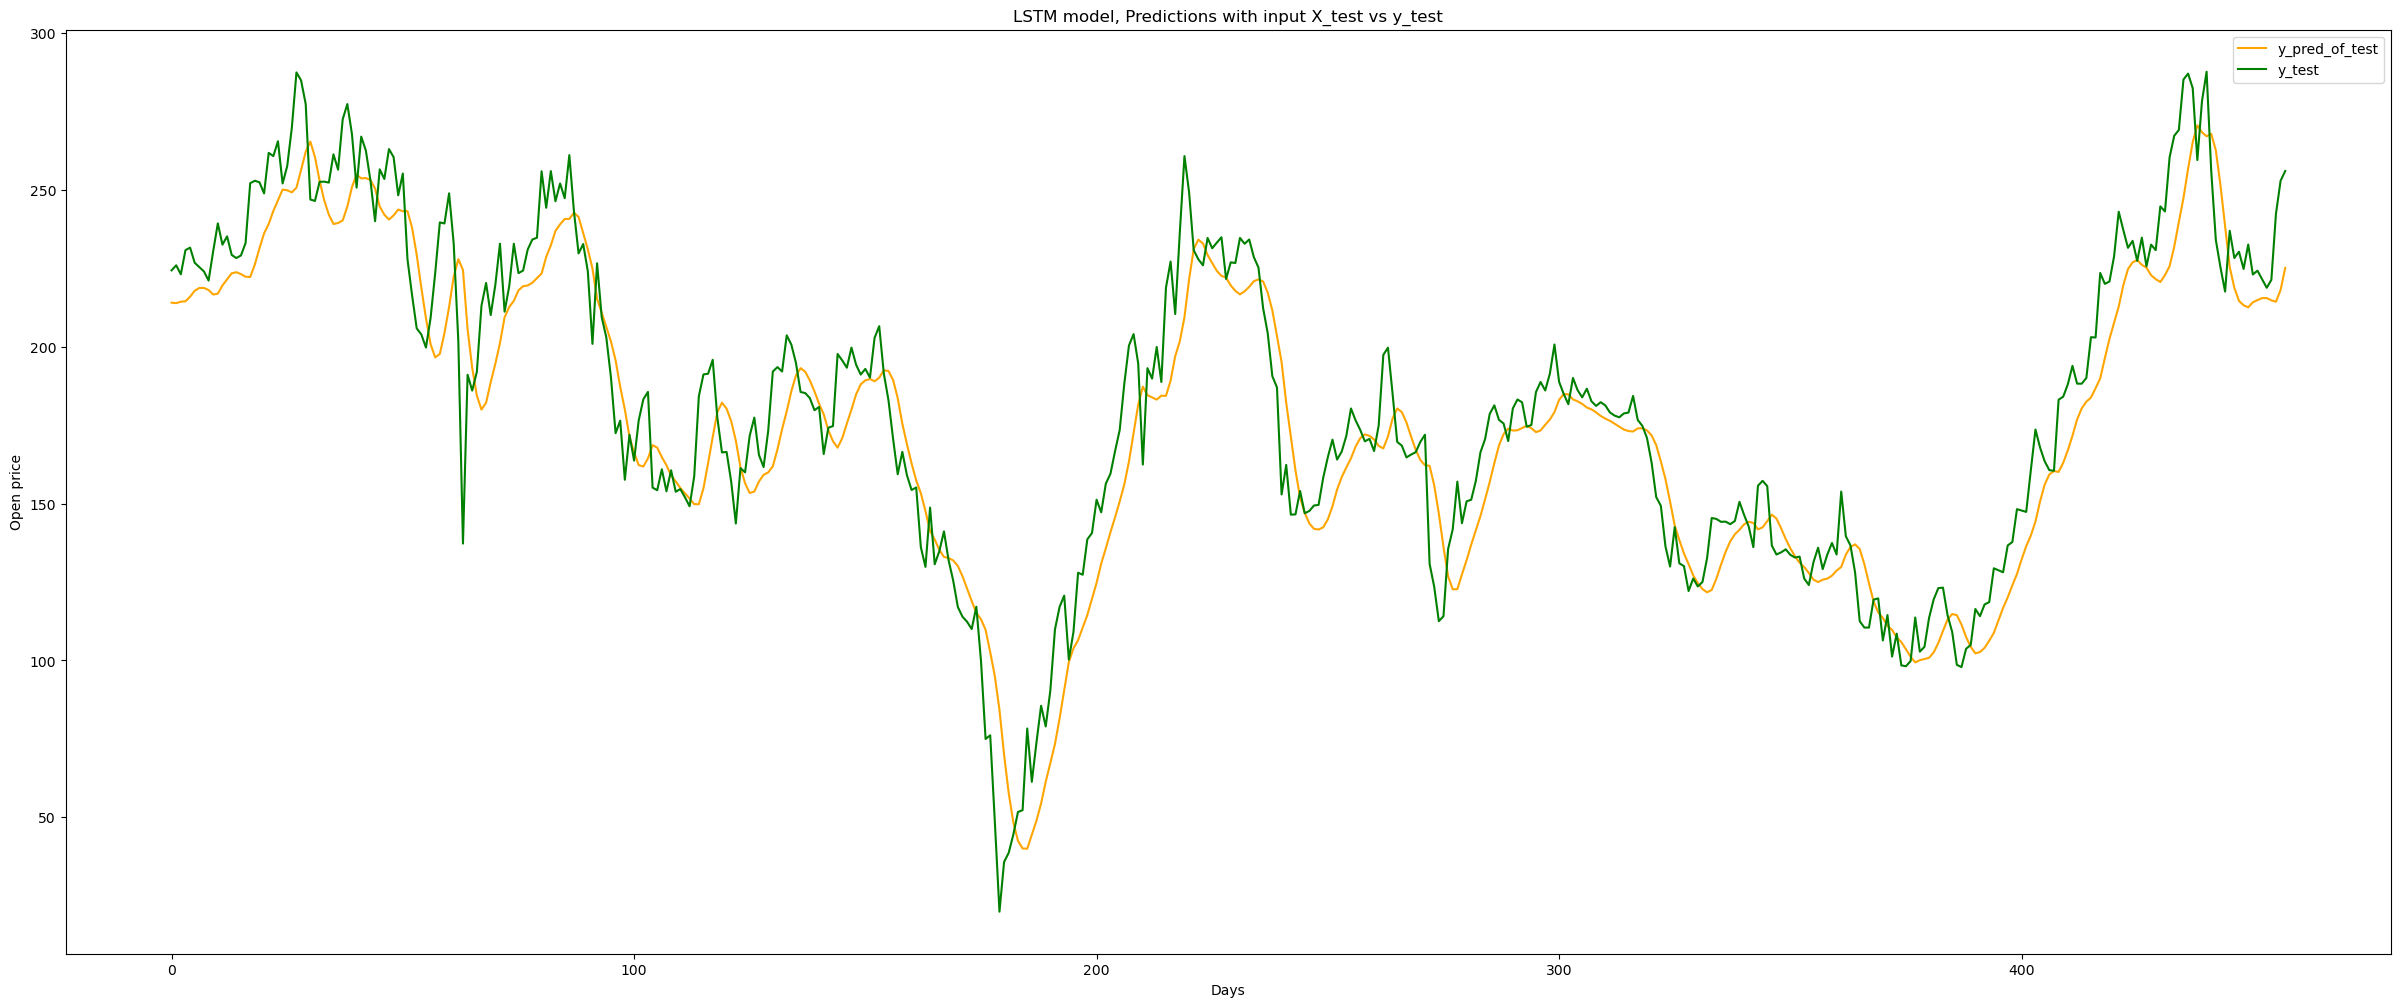

In [39]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

## 12.Future price prediction
* Which day is the last day in our data?

In [40]:
data.iloc[-1]

Date          3/17/2017
Open              264.0
High         265.329987
Low          261.200012
Close             261.5
Volume          6475900
Adj Close         261.5
Name: 1691, dtype: object

* We can predict the open price for the day after 3/17/2017--> for 3/18/2017.
* We will use last 50 days Open price as input of our model for this prediction
* Let us prepare it:

In [41]:
X_input = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_input = scaler.fit_transform(X_input.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_input, (1,50,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
X_input

Shape of X_input : (1, 50, 1)


array([[[0.        ],
        [0.00946363],
        [0.04731867],
        [0.10354429],
        [0.04917441],
        [0.04898868],
        [0.06643166],
        [0.19075893],
        [0.18983106],
        [0.38652815],
        [0.35331247],
        [0.36054942],
        [0.43755803],
        [0.57320468],
        [0.5171645 ],
        [0.46316584],
        [0.48450549],
        [0.42345532],
        [0.49415485],
        [0.40675446],
        [0.47300067],
        [0.45611434],
        [0.58953431],
        [0.57394708],
        [0.7390982 ],
        [0.80478773],
        [0.82241588],
        [0.97624793],
        [0.99424758],
        [0.94971253],
        [0.73074763],
        [0.90981655],
        [1.        ],
        [0.69734648],
        [0.48691791],
        [0.40359993],
        [0.32974585],
        [0.51512331],
        [0.43217682],
        [0.45128979],
        [0.39877539],
        [0.47318612],
        [0.38188907],
        [0.39357964],
        [0.36722971],
        [0

In [42]:
simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))

print("Simple RNN, Open price prediction for 3/18/2017      :", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for 3/18/2017 :", LSTM_prediction[0,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Simple RNN, Open price prediction for 3/18/2017      : 253.32622
LSTM prediction, Open price prediction for 3/18/2017 : 254.55629
